# ECE 174 Mini Project

In [13]:
# Import the packages
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import math
import pandas as pd

In [213]:
# Import the MNIST dataset
data = scipy.io.loadmat('mnist.mat')
train_X = data['trainX']
train_Y = data['trainY']
test_X = data['testX']
test_Y = data['testY']

print('train_X:' + str(train_X.shape))
print('train_Y:' + str(train_Y.shape))
print('test_X:' + str(test_X.shape))
print('test_Y:' + str(test_Y.shape))

train_X:(60000, 784)
train_Y:(1, 60000)
test_X:(10000, 784)
test_Y:(1, 10000)


In [35]:
# Data transformation: convert the image to float and normalize the value
train_X = train_X.astype(float)/255
train_Y = train_Y.astype(float)/255
test_X = test_X.astype(float)/255
test_Y = test_Y.astype(float)/255

## Binary Classifier

In [252]:
# Get the values of the parameters by solving the least square equations
def binary_classifier_least_square_solution(X,Y):
    ones = np.ones([X.shape[0],1])
    X_new = np.hstack((ones,X))
    solution = np.linalg.pinv(X_new.T @ X_new)@ X_new.T @ Y.T
    
    beta = solution[1:]
    alpha = solution[0]
    return (beta,alpha)

In [146]:
# Binary least square classifier that return the value of f_hat(x)
def binary_classifier(x, beta, alpha):
    a = np.dot(beta.T,x) + alpha
    if a >= 0:
        return 1
    return -1

In [445]:
def confusion_matrix(predicted,actual):
    cmatrix = np.zeros((10,10))
    for k in range(predicted.shape[0]):
        i = predicted[k].astype(int)
        j = actual[k].astype(int)
        cmatrix[i][j] += 1
    return cmatrix.astype(int)

In [447]:
def recall_rate(confusion_matrix):
    recall_rate = np.zeros(10)
    sum = np.sum(confusion_matrix, axis=0)
    for i in range(10):
        recall_rate[i] = confusion_matrix[i][i] / sum[i]
    return recall_rate

## One-versus-all Classifier
### Implementation

In [325]:
# Transfrom the original training data to binary for the k-th class
def transform_Y(train_Y,k):
    transformed_train_Y = np.zeros(train_Y.shape)
    for i in range(train_Y.shape[1]):
        if train_Y[0,i]==k:
            transformed_train_Y[0,i] = 1
        else:
            transformed_train_Y[0,i] = -1
    return transformed_train_Y

In [318]:
# Training data to get the values of parameters for the k classes
def get_parameters_one_versus_all_classifier(train_X,train_Y,k):
    beta = []
    alpha = []
    for i in range(k):
        transformed_train_Y = transform_Y(train_Y,i)
        beta_i, alpha_i = binary_classifier_least_square_solution(train_X,transformed_train_Y)
        beta.append(beta_i)
        alpha.append(alpha_i)
    return (beta, alpha)

In [332]:
# Make predictions of label Y with one-versus-all classifier
def one_versus_all_classifier(x, beta, alpha, k):
    a = np.zeros(k)
    for i in range(k):
        a[i] = beta[i].T @ x + alpha[i]
    return np.argmax(a)

In [328]:
beta, alpha = get_parameters_one_versus_all_classifier(train_X,train_Y,k=10)

### Evaluation

In [412]:
predictions = np.zeros(test_X.shape[0])
for i in range(test_X.shape[0]):
    predictions[i] = one_versus_all_classifier(test_X[i], beta, alpha, 10)

In [413]:
# Calculate the error rate of the one-versus-all classifier with the test data
err = 0
for i in range(test_X.shape[0]):
    if predictions[i] != test_Y[0][i]:
        err = err + 1
error_rate = (err/len(test_X)) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")

Error Rate: 13.9700%


In [451]:
# confusion matrix for one-versus-all classifier
one_versus_all_cmatrix = confusion_matrix(predictions,test_Y[0])
one_versus_all_cmatrix

array([[ 944,    0,   18,    4,    0,   23,   18,    5,   14,   15],
       [   0, 1107,   54,   17,   22,   18,   10,   40,   46,   11],
       [   1,    2,  813,   23,    6,    3,    9,   16,   11,    2],
       [   2,    2,   26,  880,    1,   72,    0,    6,   30,   17],
       [   2,    3,   15,    5,  881,   24,   22,   26,   27,   80],
       [   7,    1,    0,   17,    5,  659,   17,    0,   40,    1],
       [  14,    5,   42,    9,   10,   23,  875,    1,   15,    1],
       [   2,    1,   22,   21,    2,   14,    0,  884,   12,   77],
       [   7,   14,   37,   22,   11,   39,    7,    0,  759,    4],
       [   1,    0,    5,   12,   44,   17,    0,   50,   20,  801]])

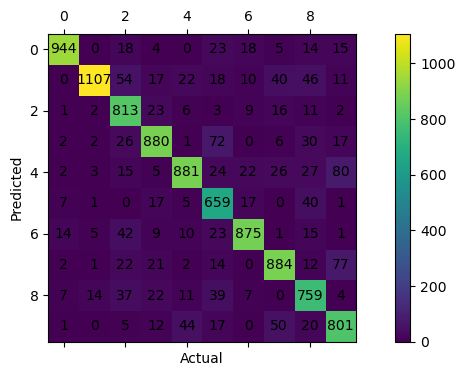

In [27]:
# https://stackoverflow.com/questions/16492830/colorplot-of-2d-array-matplotlib
H = np.array([[ 944,    0,   18,    4,    0,   23,   18,    5,   14,   15],
       [   0, 1107,   54,   17,   22,   18,   10,   40,   46,   11],
       [   1,    2,  813,   23,    6,    3,    9,   16,   11,    2],
       [   2,    2,   26,  880,    1,   72,    0,    6,   30,   17],
       [   2,    3,   15,    5,  881,   24,   22,   26,   27,   80],
       [   7,    1,    0,   17,    5,  659,   17,    0,   40,    1],
       [  14,    5,   42,    9,   10,   23,  875,    1,   15,    1],
       [   2,    1,   22,   21,    2,   14,    0,  884,   12,   77],
       [   7,   14,   37,   22,   11,   39,    7,    0,  759,    4],
       [   1,    0,    5,   12,   44,   17,    0,   50,   20,  801]])  

fig, ax = plt.subplots(figsize=(10,4))

cax = ax.matshow(H, cmap='viridis')
fig.colorbar(cax)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

for (i, j), val in np.ndenumerate(H):
    ax.text(j, i, val, ha='center', va='center')

plt.show()

In [452]:
# Recall rate of the one-versus-all classifier
recall_rate(one_versus_all_cmatrix)

array([0.96326531, 0.9753304 , 0.7877907 , 0.87128713, 0.89714868,
       0.73878924, 0.91336117, 0.85992218, 0.77926078, 0.7938553 ])

In [26]:
data = np.array([0.96326531, 0.9753304 , 0.7877907 , 0.87128713, 0.89714868,
                 0.73878924, 0.91336117, 0.85992218, 0.77926078, 0.7938553 ])

data = np.round(data, 3)

df = pd.DataFrame(data, columns=['Rate'], index = range(0,10))
df = df.transpose()
df.index.name = 'Digit'
print(df)

           0      1      2      3      4      5      6     7      8      9
Digit                                                                     
Rate   0.963  0.975  0.788  0.871  0.897  0.739  0.913  0.86  0.779  0.794


## One-versus-One Classifier
### Implementation

In [364]:
# Select the subsets of training data points that have class label i or j
def data_selection(X,Y,i,j):
    X_ij = []
    Y_ij = []
    for index, value in enumerate(Y[0]):
        if value == i:
            Y_ij.append(1)
            X_ij.append(X[index])
        elif value == j:
            Y_ij.append(-1)
            X_ij.append(X[index])
    return (X_ij, Y_ij)

In [366]:
# Training data to get the values of parameters for the pairwise binary classifier of class label i and j
def get_parameters_one_versus_one_classifier(X,Y,i,j):
    X_ij, Y_ij = data_selection(X,Y,i,j)
    X_ij = np.array(X_ij)
    Y_ij = np.array(Y_ij)
    beta, alpha = binary_classifier_least_square_solution(X_ij, Y_ij)
    return (beta, alpha)

In [376]:
# Make predictions of label Y with one-versus-one classifier
def one_versus_one_classifier(X):
    votes = np.zeros((X.shape[0],10))
    predictions = np.zeros(X.shape[0])
    for i in range(10):
        for j in range((i+1),10):
            beta, alpha = get_parameters_one_versus_one_classifier(train_X,train_Y,i,j)
            for k in range(X.shape[0]):
                prediction = binary_classifier(X[k], beta, alpha)
                if prediction == 1:
                    votes[k][i] += 1
                else:
                    votes[k][j] += 1
    for i in range(X.shape[0]):
        predictions[i] = np.argmax(votes[i])
    return predictions

### Evaluation

In [427]:
predictions2 = one_versus_one_classifier(test_X)

In [428]:
# Calculate the error rate of the one-versus-one classifier with the test data
err = 0
for i in range(predictions2.shape[0]):
    if predictions2[i] != test_Y[0][i]:
        err = err + 1
error_rate = err/len(test_X) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")

Error Rate: 7.0300%


In [453]:
# confusion matrix for one-versus-one classifier
one_versus_one_cmatrix = confusion_matrix(predictions2,test_Y[0])
one_versus_one_cmatrix

array([[ 961,    0,    9,    9,    2,    7,    6,    1,    7,    6],
       [   0, 1120,   18,    1,    4,    5,    5,   16,   17,    5],
       [   1,    3,  936,   18,    6,    3,   12,   17,    8,    1],
       [   1,    3,   12,  926,    1,   30,    0,    3,   23,   11],
       [   0,    1,   10,    2,  931,    8,    5,   11,   10,   30],
       [   6,    1,    5,   20,    1,  800,   19,    1,   36,   12],
       [   8,    4,   10,    1,    7,   17,  908,    0,   10,    0],
       [   3,    1,   10,    7,    4,    2,    1,  955,   10,   21],
       [   0,    2,   22,   21,    3,   15,    2,    1,  840,    3],
       [   0,    0,    0,    5,   23,    5,    0,   23,   13,  920]])

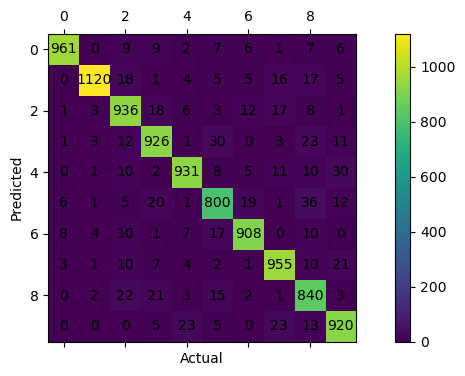

In [25]:
# https://stackoverflow.com/questions/16492830/colorplot-of-2d-array-matplotlib
H = np.array([[ 961,    0,    9,    9,    2,    7,    6,    1,    7,    6],
       [   0, 1120,   18,    1,    4,    5,    5,   16,   17,    5],
       [   1,    3,  936,   18,    6,    3,   12,   17,    8,    1],
       [   1,    3,   12,  926,    1,   30,    0,    3,   23,   11],
       [   0,    1,   10,    2,  931,    8,    5,   11,   10,   30],
       [   6,    1,    5,   20,    1,  800,   19,    1,   36,   12],
       [   8,    4,   10,    1,    7,   17,  908,    0,   10,    0],
       [   3,    1,   10,    7,    4,    2,    1,  955,   10,   21],
       [   0,    2,   22,   21,    3,   15,    2,    1,  840,    3],
       [   0,    0,    0,    5,   23,    5,    0,   23,   13,  920]])  

fig, ax = plt.subplots(figsize=(10,4))

cax = ax.matshow(H, cmap='viridis')
fig.colorbar(cax)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

for (i, j), val in np.ndenumerate(H):
    ax.text(j, i, val, ha='center', va='center')

plt.show()

In [454]:
recall_rate(one_versus_one_cmatrix)

array([0.98061224, 0.98678414, 0.90697674, 0.91683168, 0.94806517,
       0.89686099, 0.94780793, 0.92898833, 0.862423  , 0.91179386])

In [24]:
data = np.array([0.98061224, 0.98678414, 0.90697674, 0.91683168, 0.94806517,
       0.89686099, 0.94780793, 0.92898833, 0.862423  , 0.91179386])

data = np.round(data, 3)

df = pd.DataFrame(data, columns=['Rate'], index = range(0,10))
df = df.transpose()
df.index.name = 'Digit'
print(df)

           0      1      2      3      4      5      6      7      8      9
Digit                                                                      
Rate   0.981  0.987  0.907  0.917  0.948  0.897  0.948  0.929  0.862  0.912


## Designing Randomized Feature maps
### Feature map

In [746]:
# feature map.
W = np.random.randn(1000,train_X.shape[1])
b = np.random.randn(1000)
def feature_map(x):
    x_tilda = W @ x.T + b
    return x_tilda

### Implementation of one-versus-all classfier with identity function

In [533]:
# identity function
def identity(x):
    return x

In [534]:
# feature vector h_x with identity function
def feature_vector_identity_classifier(X):
    h_x = np.zeros((X.shape[0],1000))
    for i in range(X.shape[0]):
        h_x[i] = identity(feature_map(X[i]))
    return h_x

In [535]:
# transform the training data into the feature vector h_x
h_x_identity = feature_vector_identity_classifier(train_X)

In [569]:
# find the parameters with the one-versus-all classifier
beta_identity, alpha_identity = get_parameters_one_versus_all_classifier(h_x_identity,train_Y,10)

In [570]:
# Performance on training data
predictions_train_identity = np.zeros(h_x_identity.shape[0])
for i in range(h_x_identity.shape[0]):
    predictions_train_identity[i] = one_versus_all_classifier(h_x_identity[i], beta_identity, alpha_identity, 10)

In [571]:
# Error rate of the model with identity function on training data
err = 0
for i in range(predictions_train_identity.shape[0]):
    if predictions_train_identity[i] != train_Y[0][i]:
        err = err + 1
error_rate = err/len(h_x_identity) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_train_identity[:10].astype(int),train_Y[0][:10])

Error Rate: 14.2267%
[5 0 4 1 9 2 1 3 1 4] [5 0 4 1 9 2 1 3 1 4]


In [572]:
# Performance on test data
h_x_identity_test = feature_vector_identity_classifier(test_X)
predictions_test_identity = np.zeros(h_x_identity_test.shape[0])
for i in range(h_x_identity_test.shape[0]):
    predictions_test_identity[i] = one_versus_all_classifier(h_x_identity_test[i], beta_identity, alpha_identity, 10)

In [573]:
# Error rate of the model with identity function on test data
err = 0
for i in range(predictions_test_identity.shape[0]):
    if predictions_test_identity[i] != test_Y[0][i]:
        err = err + 1
error_rate = err/len(h_x_identity_test) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_test_identity[:10].astype(int),test_Y[0][:10])

Error Rate: 13.9700%
[7 2 1 0 4 1 4 9 5 9] [7 2 1 0 4 1 4 9 5 9]


### Implementation of one-versus-all classfier with sigmoid function

In [540]:
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [546]:
# feature vector h_x with sigmoid function
def feature_vector_sigmoid_classifier(X):
    h_x = np.zeros((X.shape[0],1000))
    for i in range(X.shape[0]):
        h_x[i] = sigmoid(feature_map(X[i]))
    return h_x

In [547]:
# transform the training data into the feature vector h_x
h_x_sigmoid = feature_vector_sigmoid_classifier(train_X)

/var/folders/7k/4tvcxdj56bs1cr_1j9mq4_m80000gp/T/ipykernel_5475/4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [548]:
# find the parameters with the one-versus-all classifier
beta, alpha = get_parameters_one_versus_all_classifier(h_x_sigmoid,train_Y,10)

In [549]:
# Performance on training data
predictions_train_sigmoid = np.zeros(h_x_sigmoid.shape[0])
for i in range(h_x_sigmoid.shape[0]):
    predictions_train_sigmoid[i] = one_versus_all_classifier(h_x_sigmoid[i], beta, alpha, 10)

In [557]:
# Error rate of the model with identity function on training data
err = 0
for i in range(predictions_train_sigmoid.shape[0]):
    if predictions_train_sigmoid[i] != train_Y[0][i]:
        err = err + 1
error_rate = err/len(h_x_sigmoid) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_train_sigmoid[:10].astype(int),train_Y[0][:10])

Error Rate: 8.1867%
[5 0 4 1 9 2 1 3 1 4] [5 0 4 1 9 2 1 3 1 4]


In [561]:
# Performance on test data
h_x_sigmoid_test = feature_vector_sigmoid_classifier(test_X)
predictions_test_sigmoid = np.zeros(h_x_sigmoid_test.shape[0])
for i in range(h_x_sigmoid_test.shape[0]):
    predictions_test_sigmoid[i] = one_versus_all_classifier(h_x_sigmoid_test[i], beta, alpha, 10)

/var/folders/7k/4tvcxdj56bs1cr_1j9mq4_m80000gp/T/ipykernel_5475/4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [563]:
# Error rate of the model with sigmoid function on test data
err = 0
for i in range(predictions_test_sigmoid.shape[0]):
    if predictions_test_sigmoid[i] != test_Y[0][i]:
        err = err + 1
error_rate = err/len(h_x_sigmoid_test) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_test_sigmoid[:10].astype(int),test_Y[0][:10])

Error Rate: 8.2900%
[7 2 1 0 4 1 4 9 5 9] [7 2 1 0 4 1 4 9 5 9]


### Implementation of one-versus-all classfier with sinusoidal function

In [574]:
# sinusoidal function
def sinusoidal(x):
    return math.sin(x)

In [577]:
# feature vector h_x with sinusoidal function
def feature_vector_sinusoidal_classifier(X):
    h_x = np.zeros((X.shape[0],1000))
    for i in range(X.shape[0]):
        h_x[i] = feature_map(X[i])
        for j in range(1000):
            h_x[i][j] = sinusoidal(h_x[i][j])
    return h_x

In [578]:
# transform the training data into the feature vector h_x
h_x_sinusoidal = feature_vector_sinusoidal_classifier(train_X)

In [579]:
# find the parameters with the one-versus-all classifier
beta, alpha = get_parameters_one_versus_all_classifier(h_x_sinusoidal,train_Y,10)

In [580]:
# Performance on training data
predictions_train_sinusoidal = np.zeros(h_x_sinusoidal.shape[0])
for i in range(h_x_sinusoidal.shape[0]):
    predictions_train_sinusoidal[i] = one_versus_all_classifier(h_x_sinusoidal[i], beta, alpha, 10)

In [581]:
# Error rate of the model with identity function on training data
err = 0
for i in range(predictions_train_sinusoidal.shape[0]):
    if predictions_train_sinusoidal[i] != train_Y[0][i]:
        err = err + 1
error_rate = err/len(h_x_sinusoidal) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_train_sinusoidal[:10].astype(int),train_Y[0][:10])

Error Rate: 82.2800%
[2 0 9 4 2 1 7 5 1 6] [5 0 4 1 9 2 1 3 1 4]


In [583]:
# Performance on test data
h_x_sinusoidal_test = feature_vector_sinusoidal_classifier(test_X)
predictions_test_sinusoidal = np.zeros(h_x_sinusoidal_test.shape[0])
for i in range(h_x_sinusoidal_test.shape[0]):
    predictions_test_sinusoidal[i] = one_versus_all_classifier(h_x_sinusoidal_test[i], beta, alpha, 10)

In [584]:
# Error rate of the model with sinusoidal function on test data
err = 0
for i in range(predictions_test_sinusoidal.shape[0]):
    if predictions_test_sinusoidal[i] != test_Y[0][i]:
        err = err + 1
error_rate = err/len(h_x_sinusoidal_test) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_test_sinusoidal[:10].astype(int),test_Y[0][:10])

Error Rate: 90.1600%
[0 3 6 3 7 8 2 7 8 1] [7 2 1 0 4 1 4 9 5 9]


### Implementation of one-versus-all classfier with ReLU function

In [585]:
# ReLU function
def relu(x):
    if x > 0:
        return x
    return 0

In [747]:
# feature vector h_x with ReLU function
def feature_vector_relu_classifier(X):
    h_x = np.zeros((X.shape[0],1000))
    for i in range(X.shape[0]):
        h_x[i] = feature_map(X[i])
        for j in range(1000):
            h_x[i][j] = relu(h_x[i][j])
    return h_x

In [748]:
# transform the training data into the feature vector h_x
h_x_relu = feature_vector_relu_classifier(train_X)

In [749]:
# find the parameters with the one-versus-all classifier
beta, alpha = get_parameters_one_versus_all_classifier(h_x_relu,train_Y,10)

In [750]:
# Performance on training data
predictions_train_relu = np.zeros(h_x_relu.shape[0])
for i in range(h_x_relu.shape[0]):
    predictions_train_relu[i] = one_versus_all_classifier(h_x_relu[i], beta, alpha, 10)

In [751]:
# Error rate of the model with identity function on training data
err = 0
for i in range(predictions_train_relu.shape[0]):
    if predictions_train_relu[i] != train_Y[0][i]:
        err = err + 1
error_rate = err/len(h_x_relu) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_train_relu[:10].astype(int),train_Y[0][:10])

Error Rate: 5.4233%
[5 0 4 1 9 2 1 3 1 4] [5 0 4 1 9 2 1 3 1 4]


In [752]:
# Performance on test data
h_x_relu_test = feature_vector_relu_classifier(test_X)
predictions_test_relu = np.zeros(h_x_relu_test.shape[0])
for i in range(h_x_relu_test.shape[0]):
    predictions_test_relu[i] = one_versus_all_classifier(h_x_relu_test[i], beta, alpha, 10)

In [753]:
# Error rate of the model with ReLU function on test data
err = 0
for i in range(predictions_test_relu.shape[0]):
    if predictions_test_relu[i] != test_Y[0][i]:
        err = err + 1
error_rate_1000 = err/len(h_x_relu_test) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_test_relu[:10].astype(int),test_Y[0][:10])

Error Rate: 5.4233%
[7 2 1 0 4 1 4 9 6 9] [7 2 1 0 4 1 4 9 5 9]


### Vary the number of feature L

In [682]:
# transform the data X into L feature vectors with randomized parameters W and b
def feature_vector_relu_classifier(X, L):
    W = np.random.randn(L,train_X.shape[1])
    b = np.random.randn(L)
    h_x = np.zeros((X.shape[0],L))
    for i in range(X.shape[0]):
        h_x[i] = W @ X[i].T + b
        for j in range(L):
            h_x[i][j] = relu(h_x[i][j])
    return h_x,W,b

In [683]:
# transform the test data X into L feature vectors with the corresponding parameters W and b
def feature_vector_relu_test(X,W,b,L):
    h_x = np.zeros((X.shape[0],L))
    for i in range(X.shape[0]):
        h_x[i] = W @ X[i].T + b
        for j in range(L):
            h_x[i][j] = relu(h_x[i][j])
    return h_x

#### Feature mapping with L = 250

In [717]:
# transform the training data into 250 feature vector h_x
h_x_relu_250,W,b = feature_vector_relu_classifier(train_X,250)

In [718]:
# find the parameters with the one versus all classifer
beta, alpha = get_parameters_one_versus_all_classifier(h_x_relu_250,train_Y,10)

In [719]:
# Performance on training data
predictions_train_relu_250 = np.zeros(h_x_relu.shape[0])
for i in range(h_x_relu_250.shape[0]):
    predictions_train_relu_250[i] = one_versus_all_classifier(h_x_relu_250[i], beta, alpha, 10)

In [721]:
# Error rate of the model with 250 features on training data
err = 0
for i in range(predictions_train_relu_250.shape[0]):
    if predictions_train_relu_250[i] != train_Y[0][i]:
        err = err + 1
error_rate = err/len(h_x_relu_250) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_train_relu_250[:10].astype(int),train_Y[0][:10])

Error Rate: 11.5983%
[5 0 4 1 9 2 1 3 1 4] [5 0 4 1 9 2 1 3 1 4]


In [722]:
# Performance on test data transformed into feature vactors
h_x_relu_test_250 = feature_vector_relu_test(test_X,W,b,250)
predictions_test_relu_250 = np.zeros(h_x_relu_test_250.shape[0])
for i in range(h_x_relu_test_250.shape[0]):
    predictions_test_relu_250[i] = one_versus_all_classifier(h_x_relu_test_250[i], beta, alpha, 10)

In [723]:
# Error rate of the model with 250 features on test data
err = 0
for i in range(predictions_test_relu_250.shape[0]):
    if predictions_test_relu_250[i] != test_Y[0][i]:
        err = err + 1
error_rate_250 = err/len(h_x_relu_test_250) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_test_relu_250[:10].astype(int),test_Y[0][:10])

Error Rate: 11.5983%
[7 2 1 0 4 1 4 9 4 9] [7 2 1 0 4 1 4 9 5 9]


#### Feature mapping with L = 500

In [724]:
# transform the training data into 500 feature vector h_x
h_x_relu_500,W_500,b_500 = feature_vector_relu_classifier(train_X,500)

In [725]:
# find the parameters with the one versus all classifer
beta, alpha = get_parameters_one_versus_all_classifier(h_x_relu_500,train_Y,10)

In [726]:
# Performance on training data
predictions_train_relu_500 = np.zeros(h_x_relu.shape[0])
for i in range(h_x_relu_500.shape[0]):
    predictions_train_relu_500[i] = one_versus_all_classifier(h_x_relu_500[i], beta, alpha, 10)

In [727]:
# Error rate of the model with 500 features on training data
err = 0
for i in range(predictions_train_relu_500.shape[0]):
    if predictions_train_relu_500[i] != train_Y[0][i]:
        err = err + 1
error_rate = err/len(h_x_relu_500) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_train_relu_500[:10].astype(int),train_Y[0][:10])

Error Rate: 8.0917%
[5 0 4 1 9 2 1 3 1 4] [5 0 4 1 9 2 1 3 1 4]


In [728]:
# Performance on test data transformed into feature vactors
h_x_relu_test_500 = feature_vector_relu_test(test_X,W_500,b_500,500)
predictions_test_relu_500 = np.zeros(h_x_relu_test_500.shape[0])
for i in range(h_x_relu_test_500.shape[0]):
    predictions_test_relu_500[i] = one_versus_all_classifier(h_x_relu_test_500[i], beta, alpha, 10)

In [729]:
# Error rate of the model with 500 features on test data
err = 0
for i in range(predictions_test_relu_500.shape[0]):
    if predictions_test_relu_500[i] != test_Y[0][i]:
        err = err + 1
error_rate_500 = err/len(h_x_relu_test_500) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_test_relu_500[:10].astype(int),test_Y[0][:10])

Error Rate: 8.0917%
[7 2 1 0 4 1 4 9 5 9] [7 2 1 0 4 1 4 9 5 9]


#### Feature mapping with L = 1500

In [730]:
# transform the training data into 1500 feature vector h_x
h_x_relu_1500,W_1500,b_1500 = feature_vector_relu_classifier(train_X,1500)

In [731]:
# find the parameters with the one versus all classifer
beta, alpha = get_parameters_one_versus_all_classifier(h_x_relu_1500,train_Y,10)

In [732]:
# Performance on training data
predictions_train_relu_1500 = np.zeros(h_x_relu.shape[0])
for i in range(h_x_relu_1500.shape[0]):
    predictions_train_relu_1500[i] = one_versus_all_classifier(h_x_relu_1500[i], beta, alpha, 10)

In [733]:
# Error rate of the model with 1500 features on training data
err = 0
for i in range(predictions_train_relu_1500.shape[0]):
    if predictions_train_relu_1500[i] != train_Y[0][i]:
        err = err + 1
error_rate = err/len(h_x_relu_1500) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_train_relu_1500[:10].astype(int),train_Y[0][:10])

Error Rate: 4.2950%
[5 0 4 1 9 2 1 3 1 4] [5 0 4 1 9 2 1 3 1 4]


In [734]:
# Performance on test data transformed into feature vactors
h_x_relu_test_1500 = feature_vector_relu_test(test_X,W_1500,b_1500,1500)
predictions_test_relu_1500 = np.zeros(h_x_relu_test_1500.shape[0])
for i in range(h_x_relu_test_1500.shape[0]):
    predictions_test_relu_1500[i] = one_versus_all_classifier(h_x_relu_test_1500[i], beta, alpha, 10)

In [735]:
# Error rate of the model with 1500 features on test data
err = 0
for i in range(predictions_test_relu_1500.shape[0]):
    if predictions_test_relu_1500[i] != test_Y[0][i]:
        err = err + 1
error_rate_1500 = err/len(h_x_relu_test_1500) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_test_relu_1500[:10].astype(int),test_Y[0][:10])

Error Rate: 4.2950%
[7 2 1 0 4 1 4 9 5 9] [7 2 1 0 4 1 4 9 5 9]


#### Feature mapping with L = 2000

In [736]:
# transform the training data into 2000 feature vector h_x
h_x_relu_2000,W_2000,b_2000 = feature_vector_relu_classifier(train_X,2000)

In [737]:
# find the parameters with the one versus all classifer
beta, alpha = get_parameters_one_versus_all_classifier(h_x_relu_2000,train_Y,10)

In [738]:
# Performance on training data
predictions_train_relu_2000 = np.zeros(h_x_relu.shape[0])
for i in range(h_x_relu_2000.shape[0]):
    predictions_train_relu_2000[i] = one_versus_all_classifier(h_x_relu_2000[i], beta, alpha, 10)

In [739]:
# Error rate of the model with 2000 features on training data
err = 0
for i in range(predictions_train_relu_2000.shape[0]):
    if predictions_train_relu_2000[i] != train_Y[0][i]:
        err = err + 1
error_rate = err/len(h_x_relu_2000) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_train_relu_2000[:10].astype(int),train_Y[0][:10])

Error Rate: 3.5133%
[5 0 4 1 9 2 1 3 1 4] [5 0 4 1 9 2 1 3 1 4]


In [740]:
# Performance on test data transformed into feature vactors
h_x_relu_test_2000 = feature_vector_relu_test(test_X,W_2000,b_2000,2000)
predictions_test_relu_2000 = np.zeros(h_x_relu_test_2000.shape[0])
for i in range(h_x_relu_test_2000.shape[0]):
    predictions_test_relu_2000[i] = one_versus_all_classifier(h_x_relu_test_2000[i], beta, alpha, 10)

In [741]:
# Error rate of the model with 2000 features on test data
err = 0
for i in range(predictions_test_relu_2000.shape[0]):
    if predictions_test_relu_2000[i] != test_Y[0][i]:
        err = err + 1
error_rate_2000 = err/len(h_x_relu_test_2000) * 100
print("Error Rate: " + f"{error_rate:.4f}" + "%")
print(predictions_test_relu_2000[:10].astype(int),test_Y[0][:10])

Error Rate: 3.5133%
[7 2 1 0 4 1 4 9 5 9] [7 2 1 0 4 1 4 9 5 9]


#### Plot of error rate v. number of features

In [758]:
# use the logarithmic function to fit the curve
def fit_function(x, a, b):
    return a * np.log(x) + b

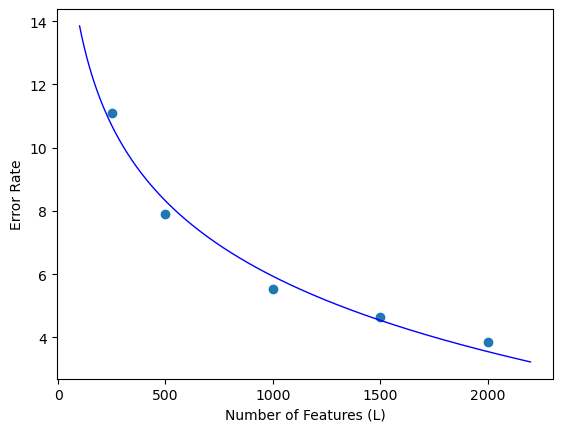

In [789]:
# data list
# independent variable: the number of features L, dependent variable: error rate
L = [250,500,1000,1500,2000]
error_rate = [error_rate_250,error_rate_500,error_rate_1000,error_rate_1500,error_rate_2000]

# the scatter plot of error rate v. the number of features L with the fitting curve
# https://stats.stackexchange.com/questions/190107/curve-fit-with-logarithmic-regression-in-python
def func(x, p1,p2):
  return p1*np.log(x)+p2

popt, pcov = scipy.optimize.curve_fit(func, L, error_rate,p0=(1.0,1.0))

p1 = popt[0]
p2 = popt[1]

curvex=np.linspace(100,2200,1000)
curvey=func(curvex,p1,p2)
plt.plot(curvex,curvey,'b', linewidth=1)

plt.scatter(L,error_rate)
plt.xlabel("Number of Features (L)")
plt.ylabel("Error Rate")

plt.show()